Exercise 6: singular value decomposition
========================================

In this exercise we are going to explore the singular value decomposition.
To kick things off, let us flex our linear algebra muscles a little bit.

Let

$$
     X = \sum_{k=0}^{K-1} s_k \vec u_k \vec v_k^T
$$

be the singular value decomposition of $X$.
**Prove** that the SVD of the regularized pseudoinverse of $X$ can be written as:

$$
    (X^T X + N \lambda^2 \mathbf 1)^{-1} X^T = \sum_{k=0}^{K-1} \frac{s_k}{s_k^2 + N \lambda^2} \vec v_k \vec u_k^T
$$

Do we need to assume $s_k \neq 0$ in the derivation? Why or why not?


Using the following identity
$$
X^{T}X = (VS\cancel{ U^{T} })(\cancel{ U }SV) = VS^{2}V
$$
The regularised Pseudoinverse becomes
$$
\begin{equation}
\begin{split}
(X^{T}X + N\lambda^{2}\mathbb{1})^{-1}X^{T} 
&= (VS^{2}V^{T} + N\lambda^{2}\mathbb{1})^{-1}X^{T}\\
&= (VS^{2}V^{T} + VV^{T}[N\lambda\mathbb{1}]VV^{T})^{-1}X^{T}\\
&= (V[S^{2} + N\lambda \cancel{ V^{T}V }]V^{T})^{-1}X^{T}\\
&= (V^{T})^{-1}[S^{2}+N\lambda\mathbb{1}]^{-1}\cancel{ V^{-1}V }SU^{T}\\
&= V[S^{2}+N\lambda\mathbb{1}]^{-1}SU^{T}\\
&= \sum_{k=0}^{K-1} \frac{s_{k}}{s_{k}^{2}+N\lambda^{2}}\vec{v}_{k}\vec{u}_{k}^{T}
\end{split}
\end{equation}
$$


As long as $\lambda, N > 0$ we do not need to assume $s_k \neq 0$ because the denominator in the final fraction will always be positive.

Polynomial fitting and the Vandermonde matrix
---------------------------------------------

Let us explore polynomial fitting a little more, since it is a very instructive
example for SVD and regularization.  Remember that given some $x_n$ and labels $y_n$
we wanted to fit a model:
$$
    \arg\min_\theta \sum_{n=0}^{N-1} \Big| y_n - \sum_{k=0}^{K-1} \theta_k x_n^k \Big|^2
    = \arg\min_\theta || \vec y - X \vec\theta ||^2
$$

The design matrix in above equation is called a [**Vandermonde matrix**](https://en.wikipedia.org/wiki/Vandermonde_matrix):
$$
    X_{nk} = x_n^{k}
$$
and it is famously nasty if you're not careful, which is why you might have had problems fitting
in the previous exercise.

Let us explore this in more detail by constructing our own fitting problem: construct a vector `x` of
`N = 101` values linearly spaced in the interval `[-1, 1]`. The construct the Vandermonde matrix `X`
for `K = 30` (i.e., maximum polynomial order 29).

In [1]:
import numpy as np

N, K = 101, 30
x = np.linspace(-1,1,N)
X = x[:, np.newaxis]**np.arange(K) # alternative: np.array([[np.power(xi, k) for k in range(K)] for xi in x])

In [2]:
import numpy as np

assert x.shape == (101,)
np.testing.assert_allclose(np.diff(x), 0.02)

assert X.shape == (101, 30)
np.testing.assert_allclose(np.linalg.cond(X), 51785875457, rtol=1e-3)

Let us analyze the design matrix: 

 1. compute the SVD of `X` using numpy's linear algebra routines.
    Store the resulting left and right singular matrices in `U` and `VT`, respectively,
    and the vector of singular values in `s`.
   
 2. Afterwards, reconstruct the original matrix from the SVD factors and store it into `X_rec`. 

**Note**: In the lecture I presented a variant of the SVD called "thin SVD", where `U` and
`VT` are not necessarily square.  Please appropriately set the `full_matrix` argument to do
so. (Remember that you can put a `?` after a function to get its signature.)

In [3]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
U.shape, np.diag(s).shape, VT.shape
X_rec = (U * s) @ VT # equivalent to: U @ np.diag(s) @ VT

In [4]:
assert (U, s, VT, X_rec) is not None
assert s.shape == (30,)
assert U.shape == (101, 30)
assert VT.shape == (30, 30)
np.testing.assert_allclose(X_rec, X, atol=1e-5)

Finally, write a function `pinv()` that takes a matrix in a singular-value decomposed
from (`U`, `s`, `VT`) and constructs the pseudo-inverse:

In [5]:
def pinv(U, s, VT):
    return (VT.T * 1/s) @ U.T # equivalent to: U @ np.diag(1/s) @ VT

In [6]:
pinv(U, s, VT)

array([[ 5.36034314e-04, -4.21169792e-03,  1.21386044e-02, ...,
         1.21385340e-02, -4.21167425e-03,  5.36031357e-04],
       [-1.24113159e-02,  1.04874022e-01, -3.34116734e-01, ...,
         3.34116327e-01, -1.04873925e-01,  1.24113062e-02],
       [-2.39713995e-01,  1.87397037e+00, -5.36139127e+00, ...,
        -5.36139057e+00,  1.87397021e+00, -2.39713979e-01],
       ...,
       [ 3.17968743e+06, -2.47037117e+07,  7.04896616e+07, ...,
        -7.04896147e+07,  2.47036992e+07, -3.17968605e+06],
       [ 3.04702383e+05, -2.16948097e+06,  5.47799499e+06, ...,
         5.47799703e+06, -2.16948170e+06,  3.04702477e+05],
       [-4.76855312e+05,  3.67178612e+06, -1.03665474e+07, ...,
         1.03665408e+07, -3.67178436e+06,  4.76855119e+05]])

In [7]:
np.testing.assert_allclose(pinv(U, s, VT), np.linalg.pinv(X))

Analyzing the singular value decomposition
------------------------------------------
Let's get a little bit of intuition on the factors in
the SVD

First, I have plotted the singular values on a logarithmic scale.

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-gafzwer8 because the default path (/home/e00473828/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


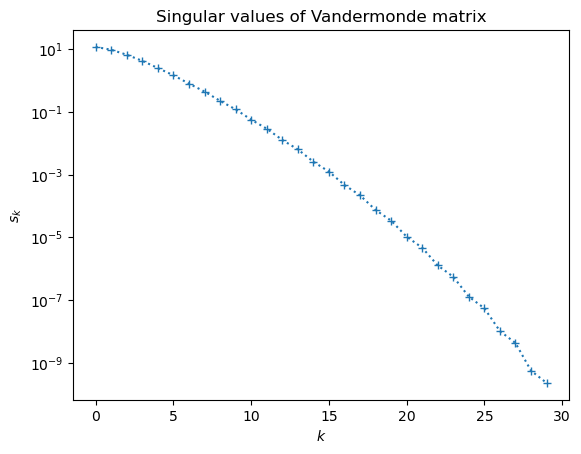

In [8]:
import matplotlib.pyplot as pl

pl.plot(s, ':+');
pl.xlabel('$k$')
pl.ylabel('$s_k$')
pl.title("Singular values of Vandermonde matrix")
pl.yscale('log')

Next, make a figure where you plot the elements of a
single left-singular vector $\vec u_k$.  You should
make three plots in total, one for $k=0$, $k=6$
and $k=K-1$, respectively (You can combine them as multiple lines
into a single figure or use subplots, however you see fit).

Think about the abscissa ($x$-axis): what does it represent? (Hint: 
the left-singular vectors live on the "row space" of $X$, so how
did you construct $X$?) Choose the axis scaling and the axis label
accordingly.  Don't forget plot labels, legend, and title.

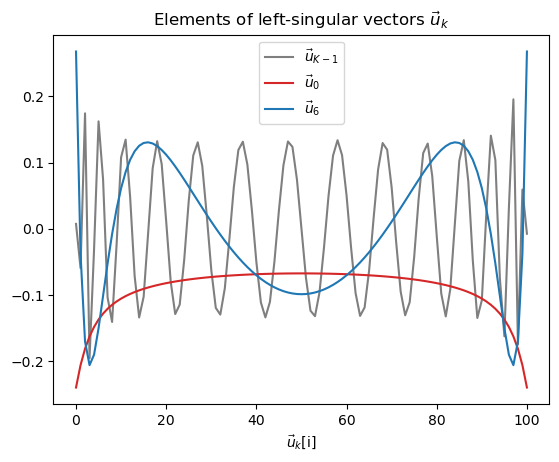

In [9]:
pl.plot(U[:,K-1], c="k", alpha=0.5, label=r"$\vec{u}_{K-1}$")
pl.plot(U[:,0], c="C3", label=r"$\vec{u}_0$")
pl.plot(U[:,6], label=r"$\vec{u}_6$")

pl.title(r"Elements of left-singular vectors $\vec{u}_k$")
pl.xlabel(r"$\vec{u}_k$[i]")
pl.legend()

Let us also plot the right-singular vectors $\vec v_k$.
You should again make three plots in total, one for $k=0$, $k=6$
and $k=K-1$, respectively.

Again think of what the axis represents. (Hint: the right-singular
vectors live on the "column space" of $X$, so how did we construct
the columns of $X$?)

**Note**: your SVD returns the transpose `VT`.  In this case the $i$-th singular vector is the $i$-th row, not the $i$-th column.

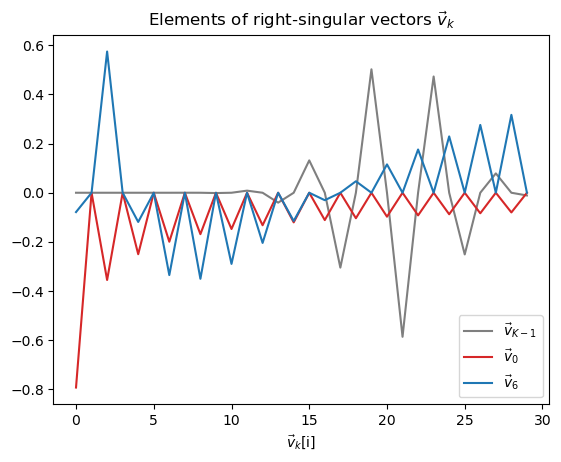

In [29]:
pl.plot(VT[K-1,:], c="k", alpha=0.5, label=r"$\vec{v}_{K-1}$")
pl.plot(VT[0,:], c="C3", label=r"$\vec{v}_0$")
pl.plot(VT[6,:], label=r"$\vec{v}_6$")

pl.title(r"Elements of right-singular vectors $\vec{v}_k$")
pl.xlabel(r"$\vec{v}_k$[i]")
pl.legend()

Let's think about what will happen if we do fitting with
a Vandermonde design matrix `X`.  Remember that fitting a
set of labels `y` is equivalent to multiplying `y` with the
pseudoinverse of `X` (what is its SVD?)

  1. First, think about the singular values. How do we expect the
     singular value $s_k$ affect the fit for $k\approx 0$,
     how for $k\approx K$?
     
  2. Imagine $y$ to indeed be some **low-order** polynomial over
     $x$ plus some noise.
     Now look at the shape for the **left** singular vectors.
     Observe that they oscillate more strongly for higher $k$.
     In changing to the singular basis, how much of the "true"
     polynomial and how much noise are you expected to pick
     up for different $k$? Why?
  
  3. Now imagine $y$ to be noisy and look at the shape of
     the **right** singular vector.  Which polynomial orders
     do you expect to end up with most of the noise?  Why?
     
Observe that we can do this analysis *purely* on the design
matrix without looking at the labels vector, i.e., we uncover
intrinsic and fundamental features of fitting polynomials
from equally spaced data points.

#### 1)
Because the singular values decrease rapidly it means that most of the interesting data is in the polynomials corresponding to the first few left singualr vectors (the lowest order ones in this case). So if we only fit those the fit will be dominated by noise. If we however fit for $k\approx K$ we are fitting polynomials where the singular vectors tell us there is no useful information, meaning we will be fitting noise at that point.

#### 2)
Because the noise is completely uncorrelated if we want to describe it exactly we would need a super high order polynomial that can capture all of it. This means that the left singular vectors that oscillate more strongly have a better ability to pick up noise than the weaker oscillating ones. The true polynomial will be picked up the best by the left singular vectors oscillating in the most similar way to the true polynomials.


Generating truth and noise
--------------------------
Let us try our luck by fitting a fourth-order polyomial, which for
the moment is our "truth".  Below I have defined $\theta_\mathrm{true}$, which
are the true parameter set $\vec\theta_\mathrm{true}$ and the corresponding model
$y_\mathrm{true}(x) = f(x, \vec\theta_\mathrm{true})$.

In [11]:
# The Truth (TM)
theta_true = np.zeros(30)
theta_true[:5] = [-0.05, .13, .87, 0, -1]

def get_y_true(x):
    """True labels (without noise) for a given `x` in `[-1, 1]`"""
    x = np.asarray(x)
    if not np.all(x >= -1) and np.all(x < 1):
        raise ValueError("x must be between -1 and 1")
    return (x[..., np.newaxis]**np.arange(30) * theta_true).sum(-1)

Let us now **generate some labels** from this truth plus some noise.

Generate the vector of true labels `y_true` for your $x$ values. Then,
generate a "noise vector" `epsilon` where you draw each element from a 
normal distribution with mean `0` and standard deviation of `0.1`.
Finally `y_noisy` should be the sum of truth plus noise.

In [12]:
rng = np.random.default_rng(4711)

In [13]:
y_true = get_y_true(x)
epsilon = np.random.normal(loc=0, scale=0.1, size=len(y_true))

y_noisy = y_true + epsilon

In [14]:
assert (y_true, epsilon, y_noisy) is not None
np.testing.assert_allclose(y_true, y_noisy - epsilon)

_stddev = np.sqrt(np.linalg.norm(y_noisy - y_true)/y_true.size)
np.testing.assert_allclose(_stddev, 0.1, atol=0.03,
                           err_msg="noise not distributed correctly")

Below, I have plotted the "truth" `y_true` and the noisy data `y_noise`.

If everything went well, you should see a point cloud that roughly
follows the shape of our truth (fourth-order polynomial).

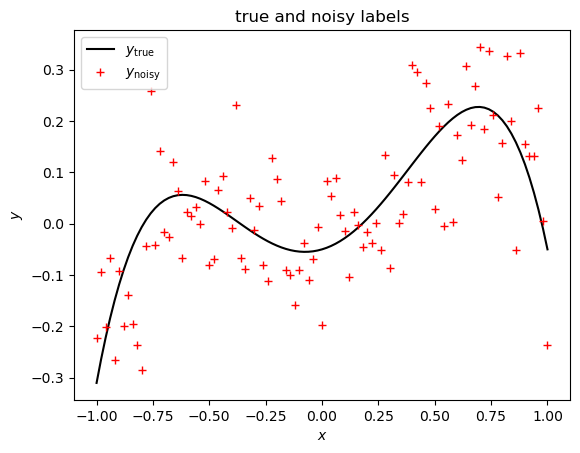

In [15]:
pl.plot(x, y_true, '-k', label='$y_\mathrm{true}$')
pl.plot(x, y_noisy, '+r', label='$y_\mathrm{noisy}$')
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.legend()
pl.title("true and noisy labels");

Fitting data
------------
Let us now try to fit our noisy labels `y_noisy`.

To do so, use `pinv()` to compute the pseudoinverse of `X`
and then use that to compute `theta_star`.  Plot your
fitting parameters together with the true parameters
`theta_true`.

In [16]:
theta_star = pinv(U, s, VT) @ y_noisy

Below, I am plotting true solution for the polynomial coefficents (`theta_true` $= \theta$) on the top and the
fitted solution, where we have added some noise (`theta_star` $= \theta^*$) on the bottom.

**Note** the different scale on the bottom plot (the $y$-axis must be multiplied by the number on the top left
of the plot).

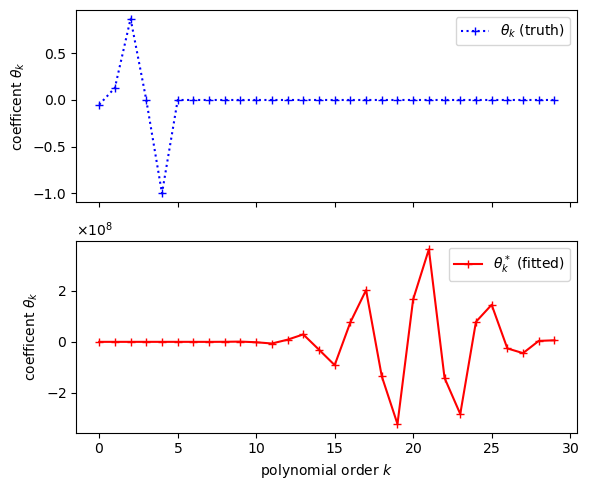

In [17]:
def _plot_one(sub, theta, fmt, label):
    pl.subplot(sub)
    pl.plot(theta, fmt, label=label)
    pl.ylabel(r'coefficent $\theta_k$')
    pl.legend()

pl.figure(figsize=(6,5))
_plot_one(211, theta_true, ':+b', r'$\theta_k$ (truth)')
pl.gca().set_xticklabels([])
_plot_one(212, theta_star, '-+r', r'$\theta^*_k$ (fitted)')
pl.xlabel('polynomial order $k$')
pl.gca().ticklabel_format(useMathText=True)
pl.tight_layout(h_pad=1)

 1. Observe the scale of the y axis in the above plot. (The noisy data is clearly
    several orders of magnitudes "too big" with respect to the truth). Why?
    What is the connection of the scale of the coefficient with the singular values?
    
 2. The shape of the noisy coefficients should look familiar (check with the 
    plots in the singular value decomposition).  Explain this.

#### 1)
The predicted coefficients are inversly related to the size of the singular values since in the pseudoinverse the singular values give a $1/s_k$ factor. Because the singular values for the large order polynomials are very very small the coefficients get very big to compensate.
#### 2)
It has the same sort of oscillation as the elements of the right singular vectors. It does make sense because the right singular vectors represent how much of each left singular vector was present in the data, and these coefficients here represent how much of each polynomial is present in the data.

Regularization
--------------
Finally, let us regularize our problem.  One of the simplest regularization
techniques is to just use Ridge regression.  Again, we
choose:
$$
    X^\oplus_\lambda = \sum_{k=0}^{K-1} \frac{s_k}{s_k^2 + N \lambda^2} \vec v_k \vec u_k^T
$$

Copy the function `pinv` into `pinv_ridge` and modify is such that it computes the
above expression

In [18]:
def pinv_ridge(U, s, VT, lambda_):
    return (VT.T * (s)/(s**2 + N*lambda_**2)) @ U.T

In [19]:
pinv_ridge(U, s, VT, 0.1)

array([[ 0.0013888 ,  0.00108128,  0.00017114, ...,  0.00017114,
         0.00108128,  0.0013888 ],
       [-0.00922266,  0.00146644,  0.00807133, ..., -0.00807133,
        -0.00146644,  0.00922266],
       [ 0.00758723, -0.01180496, -0.01777253, ..., -0.01777253,
        -0.01180496,  0.00758723],
       ...,
       [-0.08904324, -0.0005903 ,  0.03408853, ..., -0.03408853,
         0.0005903 ,  0.08904324],
       [ 0.10333147, -0.00400238, -0.04322331, ..., -0.04322331,
        -0.00400238,  0.10333147],
       [-0.10151933,  0.0071014 ,  0.0446944 , ..., -0.0446944 ,
        -0.0071014 ,  0.10151933]])

In [20]:
_reg_pinv = np.linalg.pinv(np.vstack([X, np.sqrt(101) * 0.1 * np.eye(30)]))[:, :101]
np.testing.assert_allclose(pinv_ridge(U, s, VT, 0.1), _reg_pinv, atol=1e-5)

Below, on the left-hand side, I have plotted $\theta^* = X^\oplus y$ for three different values of $\lambda$:
0.1, 0.01, and 0.001.  Also I have plotted the "true" parameters for reference.

On the right-hand side, I have plotted the predicted values $\hat y = X \theta^*$ for
the parameters fitted with the same $\lambda$: 0.1, 0.01, and 0.001.  Again,
I have plotted the true $y$ for reference.

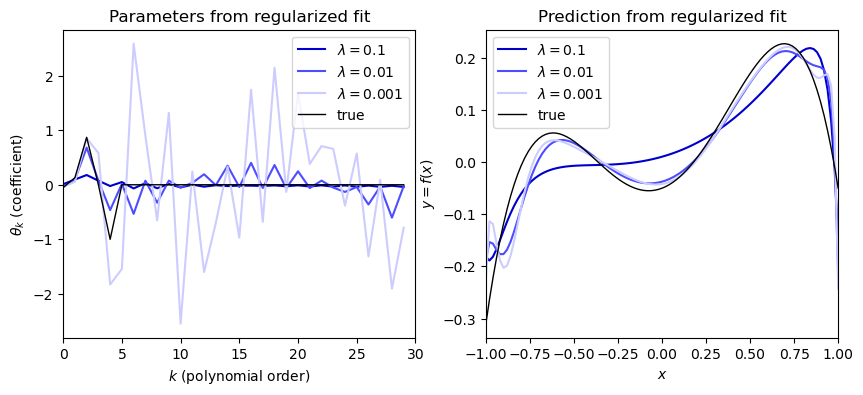

In [21]:
pl.figure(figsize=(10,4))
pl.subplot(121)
pl.title("Parameters from regularized fit")
pl.plot(pinv_ridge(U, s, VT, 0.1) @ y_noisy,
        label='$\lambda=0.1$', c=(0,0,.8))
pl.plot(pinv_ridge(U, s, VT, 0.01) @ y_noisy, 
        label='$\lambda=0.01$', c=(.3,.3,1))
pl.plot(pinv_ridge(U, s, VT, 0.001) @ y_noisy, 
        label='$\lambda=0.001$', c=(.8,.8,1))
pl.plot(theta_true, '-k', label='true', lw=1)
pl.xlabel(r"$k$ (polynomial order)")
pl.ylabel(r"$\theta_k$ (coefficient)")
pl.xlim(0,30)
pl.legend()

pl.subplot(122)
pl.title("Prediction from regularized fit")
pl.plot(x, X @ pinv_ridge(U, s, VT, 0.1) @ y_noisy, 
        label=r'$\lambda=0.1$', c=(0,0,.8))
pl.plot(x, X @ pinv_ridge(U, s, VT, 0.01) @ y_noisy,
        label=r'$\lambda=0.01$', c=(.3,.3,1))
pl.plot(x, X @ pinv_ridge(U, s, VT, 0.001) @ y_noisy, 
        label=r'$\lambda=0.001$', c=(.8,.8,1))
pl.plot(x, y_true, '-k', label=r'true', lw=1)
pl.xlabel("$x$")
pl.ylabel("$y=f(x)$")
pl.xlim(-1, 1)
pl.legend()

Examine these plots and then summarize your results:

 1. which value of lambda gives the best fit? How can you explain this from the error and the SVD?
 
 2. why are the parameters `theta` for small `lambda` changing so much more than the predicted label `y`?
 What is going on there?

#### 1)
`lambda` = 0.01 gives the best fit because only the first few parameters (coefficients) have a significant impact on the plot. Even though `lambda`=0.001 produces a good plot its parameter values are all over the place indicating that we are overfitting/using a model with too many parameters. From the SVD we can also see (if we plot the singular values without the log scale), that only the first 5-6 singular values have a significant size, and thus we should expect the order of polynomial needed to be at most 5-6, and for `lambda`=0.01 that is about where the coefficients become very small. Compared to `lambda`=0.1 we can easily see that `lambda`=0.01 fits the true data better in the above right graph. 
#### 2)
When `lambda` is very small, but not zero the optimisation problem can become very sensitive to numerical errors and the solutions for the predicted parameters become unstable, even though the predicted fit looks basically the same. Because we have too many parameters available to use there are too many parameter value combinations that all essentially lead to the same plot, and which one is chosen is highly dependent on the exact value of `lambda`.

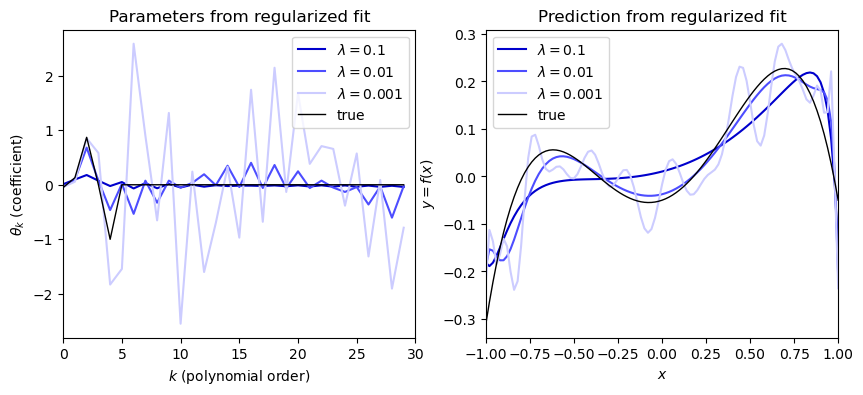

In [22]:
pl.figure(figsize=(10,4))
pl.subplot(121)
pl.title("Parameters from regularized fit")
pl.plot(pinv_ridge(U, s, VT, 0.1) @ y_noisy,
        label='$\lambda=0.1$', c=(0,0,.8))
pl.plot(pinv_ridge(U, s, VT, 0.01) @ y_noisy, 
        label='$\lambda=0.01$', c=(.3,.3,1))
pl.plot(pinv_ridge(U, s, VT, 0.001) @ y_noisy, 
        label='$\lambda=0.001$', c=(.8,.8,1))
pl.plot(theta_true, '-k', label='true', lw=1)
pl.xlabel(r"$k$ (polynomial order)")
pl.ylabel(r"$\theta_k$ (coefficient)")
pl.xlim(0,30)
pl.legend()

pl.subplot(122)
pl.title("Prediction from regularized fit")
pl.plot(x, X @ pinv_ridge(U, s, VT, 0.1) @ y_noisy, 
        label=r'$\lambda=0.1$', c=(0,0,.8))
pl.plot(x, X @ pinv_ridge(U, s, VT, 0.01) @ y_noisy,
        label=r'$\lambda=0.01$', c=(.3,.3,1))
pl.plot(x, X @ pinv_ridge(U, s, VT, 0.000) @ y_noisy, 
        label=r'$\lambda=0.001$', c=(.8,.8,1))
pl.plot(x, y_true, '-k', label=r'true', lw=1)
pl.xlabel("$x$")
pl.ylabel("$y=f(x)$")
pl.xlim(-1, 1)
pl.legend()